# SVR using linear kernal, 2000 datapoints, standardScaler, RealTime Data

In [178]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline


In [179]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
df = pd.DataFrame(json.loads(res.content)['Data'])

In [180]:
df = df.drop(['conversionType', 'conversionSymbol'], axis = 1)

In [181]:
df.head()

,time,high,low,open,volumefrom,volumeto,close
0,1465344000,582.44,567.78,575.58,49604.16,2.870622e+07,580.51
1,1465430400,580.71,569.26,580.51,48613.35,2.801058e+07,574.69
2,1465516800,579.26,571.14,574.69,45501.86,2.629087e+07,577.89
3,1465603200,592.61,576.29,577.89,42217.02,2.479044e+07,591.60
4,1465689600,683.85,592.79,591.60,217379.53,1.396846e+08,666.55


In [182]:
df.tail()

,time,high,low,open,volumefrom,volumeto,close
1996,1637798400,59437.04,57056.64,57175.09,24221.47,1.412787e+09,58966.99
1997,1637884800,59201.95,53575.54,58966.99,60064.72,3.312563e+09,53788.22
1998,1637971200,55316.65,53668.95,53788.22,18504.73,1.010586e+09,54805.03
1999,1638057600,57475.26,53436.05,54805.03,21562.34,1.186995e+09,57331.41
2000,1638144000,58547.00,56752.37,57331.41,20452.07,1.174302e+09,58546.79


In [183]:
df = df.drop('time', axis = 1)

In [184]:
list(df.columns)

['high', 'low', 'open', 'volumefrom', 'volumeto', 'close']

In [185]:
test_df = df[-30:]

In [186]:
test_df

,high,low,open,volumefrom,volumeto,close
1971,62420.57,60022.06,61891.91,19359.29,1.181934e+09,61349.75
1972,62482.31,59554.88,61349.75,31925.65,1.955089e+09,60960.98
1973,64283.57,60677.48,60960.98,36009.96,2.260756e+09,63260.05
1974,63553.52,61057.89,63260.05,29618.09,1.852234e+09,62929.93
1975,63102.86,60745.84,62929.93,23030.57,1.420765e+09,61448.47
1976,62621.97,60789.16,61448.47,20540.56,1.262030e+09,61019.66
1977,61594.16,60130.85,61019.66,15432.25,9.395301e+08,61529.76
1978,63309.57,61406.56,61529.76,14937.90,9.295720e+08,63302.78
1979,67755.46,63302.78,63302.78,39774.17,2.614940e+09,67549.14
1980,68514.26,66312.42,67549.14,32745.53,2.209552e+09,66939.24


In [187]:
X_test = test_df.iloc[:, [0, 1, 2, 3, 4]].values
y_test = test_df.iloc[:, [5]].values

In [188]:
from sklearn.preprocessing import StandardScaler

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

sc_y_test = StandardScaler()
y_test = sc_y_test.fit_transform(y_test)

In [189]:
train_df = df[:len(df)-30]

In [190]:
X = train_df.iloc[:, [0, 1, 2, 3, 4]].values
y = train_df.iloc[:, [5]].values

In [191]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [192]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [194]:
from sklearn.svm import SVR
# Create and train the Support Vector Machine 
svr_linear = SVR(kernel='linear')#Create the model
svr_linear.fit(X_train, y_train) #Train the model

c:\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='linear')

In [195]:
svr_linear_confidence = svr_linear.score(X_val, y_val)
print("svr_linear accuracy: ", svr_linear_confidence)

svr_linear accuracy:  0.9979284231283712


In [196]:
# Print the predicted value
y_val_prediction = svr_linear.predict(X_val)
y_val_prediction = sc_y_test.inverse_transform(y_val_prediction)

print()

#Print the actual values
y_val_test = sc_y_test.inverse_transform(y_val)

In [197]:
print(np.concatenate((y_val_prediction.reshape(len(y_val_prediction),1), y_val_test.reshape(len(y_val_test),1)),1))

[[59954.90020142 59798.70416104]
 [59068.73759354 58889.57325818]
 [60213.50891467 60152.59442771]
 [59981.09595462 59844.30664883]
 [58287.00835208 58114.43193237]
 [68985.88898418 69352.08229601]
 [60361.99020171 60244.82283757]
 [58281.46781783 58108.41065083]
 [58372.17185953 58232.42748033]
 [58317.00974125 58125.24683324]
 [58717.19801715 58545.56854062]
 [59960.47964208 59780.11712581]
 [58287.17977147 58094.82146285]
 [58299.78804651 58112.7568045 ]
 [60451.515622   60454.72094861]
 [70796.41677577 71158.42315753]
 [58488.74023427 58319.04306449]
 [58432.15750655 58256.82239039]
 [60734.35836045 60593.64641612]
 [63403.55531496 63406.32608004]
 [58208.06456146 58104.80797857]
 [59687.86493227 59539.04557359]
 [60301.51699722 60148.43184969]
 [60590.7664878  60496.36279161]
 [60620.72189238 60510.42009751]
 [59582.96859947 59396.3155006 ]
 [58351.73855419 58169.86948596]
 [59707.09012655 59505.11620287]
 [59964.46535248 59838.50106869]
 [58290.82778031 58101.31315701]
 [58691.47

In [198]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)

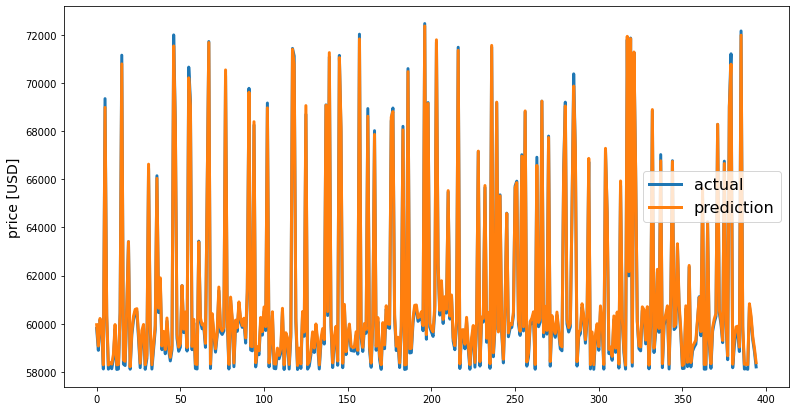

In [199]:
line_plot(y_val_test, y_val_prediction, 'actual', 'prediction', lw=3)

# test data

In [200]:
# Print the predicted value
y_prediction = svr_linear.predict(X_test)
y_prediction = sc_y_test.inverse_transform(y_prediction)

print()

#Print the actual values
y_test = sc_y_test.inverse_transform(y_test)

In [201]:
print(np.concatenate((y_prediction.reshape(len(y_prediction),1), y_test.reshape(len(y_test),1)),1))

[[61337.02669743 61349.75      ]
 [61210.73325988 60960.98      ]
 [63081.0055103  63260.05      ]
 [62347.19315241 62929.93      ]
 [61955.36759155 61448.47      ]
 [62076.5484801  61019.66      ]
 [61155.33187456 61529.76      ]
 [62849.56723877 63302.78      ]
 [66225.88073855 67549.14      ]
 [67612.23903572 66939.24      ]
 [65962.39050227 64926.06      ]
 [65128.79143218 64820.8       ]
 [63886.37181307 64156.3       ]
 [64471.74597313 64409.56      ]
 [64857.4468598  65509.06      ]
 [64950.83084805 63614.06      ]
 [60786.08968659 60108.9       ]
 [59942.82507641 60365.6       ]
 [58613.29922889 56930.68      ]
 [57395.01981187 58136.22      ]
 [59119.36888719 59769.66      ]
 [59556.15984545 58700.83      ]
 [57530.75583919 56303.06      ]
 [57139.24356811 57566.6       ]
 [57018.06570227 57175.09      ]
 [58840.8951433  58966.99      ]
 [55968.9820375  53788.22      ]
 [55078.83390865 54805.03      ]
 [55888.68134432 57331.41      ]
 [58091.95093185 58546.79      ]]


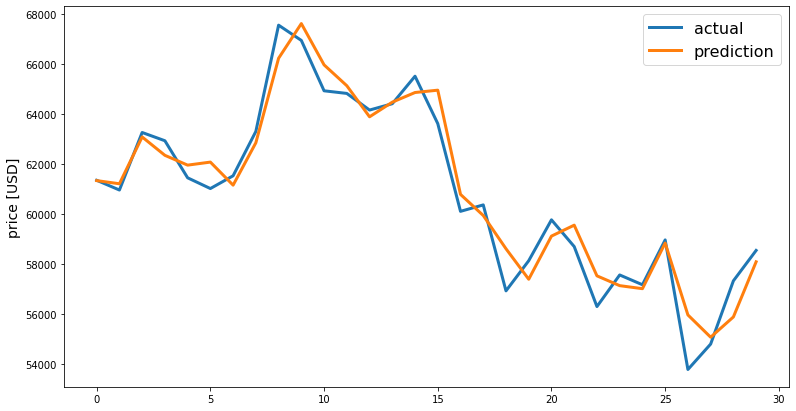

In [202]:
line_plot(y_test, y_prediction, 'actual', 'prediction', lw=3)

In [203]:
from sklearn.metrics import max_error

mre = max_error(y_test, y_prediction)
print("Maximum Residual Error :", mre)

Maximum Residual Error : 2180.762037495828


In [204]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_prediction)
print("Mean absolute Error :", mae)

Mean absolute Error : 679.8824439654932


In [205]:
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_prediction)
rmse = math.sqrt(mse)
print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)

Mean Squared Error : 727888.060330418
Root Mean Squared Error : 853.1635601280789


In [206]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_prediction)
print("Mean absolute percentage error : ", mape)

Mean absolute percentage error :  0.011343709384877686


In [207]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_prediction)
print("R2 error", r2)

R2 error 0.9404069734162321
